# Introduction

Constructing a neural network from scratch using Keras involves defining the architecture of the model, specifying the number of layers, the number of neurons in each layer, and the activation functions. After defining the model, you can train it on your dataset and then visualize the results.

# Import package

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.utils import to_categorical

# Generate data

In [19]:
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Simple binary classification task
y_one_hot = to_categorical(y, num_classes=2)

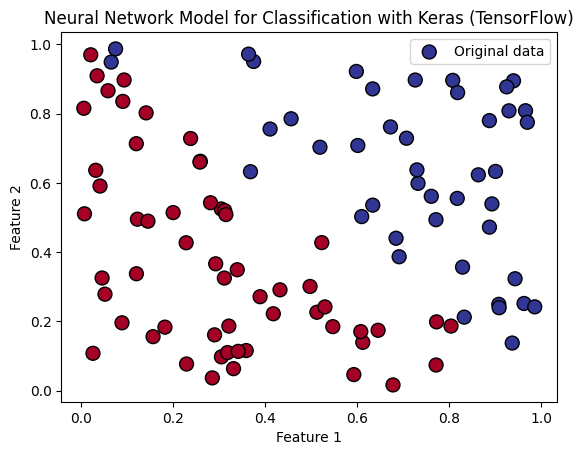

In [20]:
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o', s=100, label='Original data')
xx, yy = np.meshgrid(np.linspace(0, 1.5, 100), np.linspace(0, 1.5, 100))
plt.title('Neural Network Model for Classification with Keras (TensorFlow)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Model with two hidden layers

In [27]:
model_2_layers = Sequential()
model_2_layers.add(Dense(10, input_dim=2, activation='relu'))
model_2_layers.add(Dense(5, activation='relu'))
model_2_layers.add(Dense(2, activation='softmax'))

# Model with three hidden layers

In [28]:
model_3_layers = Sequential()
model_3_layers.add(Dense(10, input_dim=2, activation='relu'))
model_3_layers.add(Dense(8, activation='relu'))
model_3_layers.add(Dense(5, activation='relu'))
model_3_layers.add(Dense(2, activation='softmax'))

# Compile the models

In [29]:
model_2_layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3_layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models

In [30]:
model_2_layers.fit(X, y_one_hot, epochs=100, verbose=0)
model_3_layers.fit(X, y_one_hot, epochs=100, verbose=0)

# Plot the model architecture

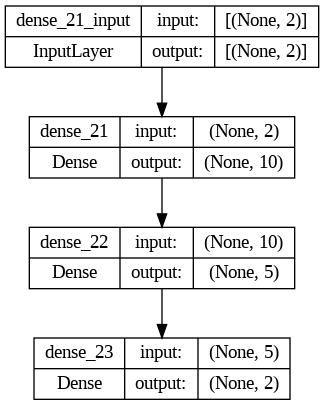

In [31]:
# Plot the model architecture Hidden layers =2
plot_model(model_2_layers, to_file='keras_classification_model.png', show_shapes=True, show_layer_names=True)

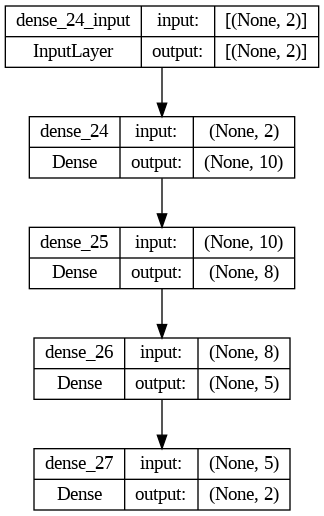

In [32]:
# Plot the model architecture Hidden layers =3
plot_model(model_3_layers, to_file='keras_classification_model.png', show_shapes=True, show_layer_names=True)

# Plot the results

313/313 [==============================] - 1s 3ms/step


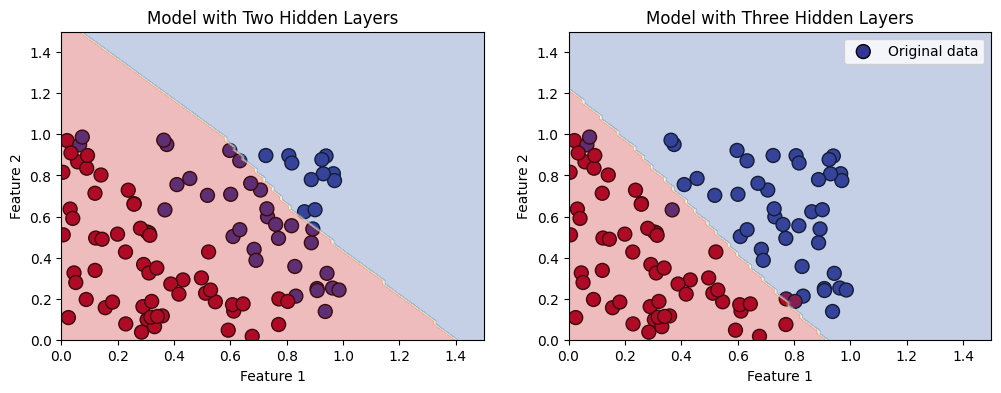

In [33]:
# Plot decision boundaries in subplot with two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for model with two hidden layers
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o', s=100, label='Original data')
xx, yy = np.meshgrid(np.linspace(0, 1.5, 100), np.linspace(0, 1.5, 100))
Z_2_layers = model_2_layers.predict(np.c_[xx.ravel(), yy.ravel()])
Z_2_layers = np.argmax(Z_2_layers, axis=1).reshape(xx.shape)
axes[0].contourf(xx, yy, Z_2_layers, cmap=plt.cm.RdYlBu, alpha=0.3)
axes[0].set_title('Model with Two Hidden Layers')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Plot for model with three hidden layers
axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o', s=100, label='Original data')
Z_3_layers = model_3_layers.predict(np.c_[xx.ravel(), yy.ravel()])
Z_3_layers = np.argmax(Z_3_layers, axis=1).reshape(xx.shape)
axes[1].contourf(xx, yy, Z_3_layers, cmap=plt.cm.RdYlBu, alpha=0.3)
axes[1].set_title('Model with Three Hidden Layers')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.legend()
plt.show()